In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
precip_data = create_engine("sqlite:///Resources/hawaii.sqlite")

conn = precip_data.connect()
data = pd.read_sql("SELECT * FROM measurement", conn)

twelve_months = data[19185:]
twelve_months.head()

twelve_months_new = twelve_months[['date', 'prcp', 'tobs']]
twelve_months_new.head()
# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data

,date,prcp,tobs
19185,2016-08-07,1.30,79.0
19186,2016-08-08,0.02,75.0
19187,2016-08-09,0.56,73.0
19188,2016-08-10,0.00,76.0
19189,2016-08-11,0.04,74.0


Text(0, 0.5, 'Precipitation Amount')

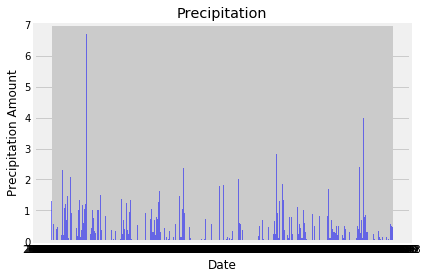

In [12]:
y_axis = twelve_months_new['prcp']
x_axis = twelve_months_new['date']
plt.bar(x_axis, y_axis, color='b', alpha=0.5, align="center")

plt.title("Precipitation")
plt.xlabel("Date")
plt.ylabel("Precipitation Amount")

In [168]:
# Use Pandas to calcualte the summary statistics for the precipitation data

In [228]:
precip_describe = twelve_months_new['prcp'].describe()
precip_describe

count    344.000000
mean       0.460494
std        0.713201
min        0.000000
25%        0.010000
50%        0.215000
75%        0.657500
max        6.700000
Name: prcp, dtype: float64

In [229]:
# Design a query to show how many stations are available in this dataset?

In [230]:
stations = session.query(Station.id).count()
stations

9

In [231]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
max_station = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc())
session.execute(max_station)
df2 = pd.read_sql("""
Select station, count(station) 
from Measurement 
group by station 
order by count(station) desc
""", conn)

In [232]:
df2

,station,count(station)
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [241]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
df3 = pd.read_sql("""
Select station, tobs, date 
from Measurement 
""", conn)

In [242]:
df3_temp = df3.loc[df3["station"]=="USC00519281"]
print(df3_temp["tobs"].max())
print(df3_temp["tobs"].min())
print(df3_temp["tobs"].mean())

85.0
54.0
71.66378066378067


In [235]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

Text(0, 0.5, 'Frequency')

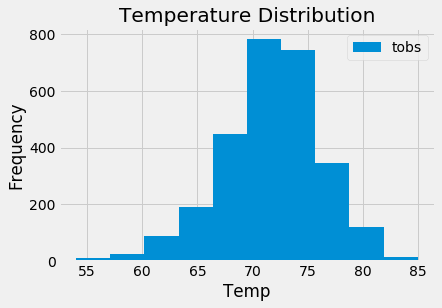

In [246]:
most_active = df3.loc[df3["station"]=="USC00519281"]
# y_axis = most_active['tobs']
# x_axis = most_active['date']
# plt.histogram(x_axis, y_axis, color='b', alpha=0.5)
hist_chart = most_active.set_index("date")
hist_chart.plot(kind="hist")
plt.title("Temperature Distribution")
plt.xlabel("Temp")
plt.ylabel("Frequency")

In [247]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [254]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
print(calc_temps('2017-05-15', '2017-05-30'))

[(68.0, 74.94505494505495, 87.0)]


Text(0, 0.5, 'Temperature')

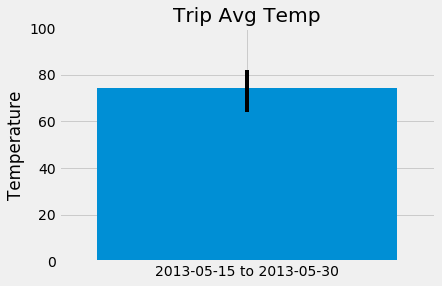

In [256]:
trip_dates = '2013-05-15 to 2013-05-30'
trip_temps = calc_temps('2013-05-15', '2013-05-30')

low_range = trip_temps[0][0]
avg_range = trip_temps[0][1]
upper_range = trip_temps[0][2]

min_error = avg_range - low_range
max_error = upper_range - avg_range

errorBars = np.array([[min_error], [max_error]])
plt.bar(trip_dates, avg_range, yerr=errorBars)
plt.ylim(0, 100)
plt.xlim(-0.5, 0.5)
plt.title('Trip Avg Temp')
plt.ylabel('Temperature')

In [19]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation


[('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 0.31), ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 0.25), ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6, 0.1), ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 0.060000000000000005), ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9, 0.0), ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 0.0), ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 0.0), ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.0), ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 0.0)]
